In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("creditcard.csv")
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  37722.000000  37722.000000  37722.000000  37722.000000  37722.000000   
mean   24766.905519     -0.207438      0.060003      0.717371      0.192425   
std    12527.587139      1.826290      1.542122      1.518753      1.404199   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    13890.000000     -0.962070     -0.514064      0.239253     -0.715389   
50%    29826.000000     -0.231670      0.107303      0.822135      0.188408   
75%    34937.750000      1.161603      0.748540      1.451850      1.073459   
max    39077.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  37722.000000  37722.000000  37721.000000  37721.000000  37721.000000   
mean      -0.223913      0.099322     -0.113878      0.036184      0.234569   
std        1.379541      1.306858      1.250118    

In [4]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0027380509330639587
Fraud Cases: 103
Valid Transactions: 37618


In [5]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,103.000000
mean,90.471165
std,247.173335
min,0.000000
25%,1.000000
50%,3.760000
75%,99.990000
max,1809.680000


In [6]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,37618.000000
mean,86.017411
std,232.957939
min,0.000000
25%,7.300000
50%,22.880000
75%,77.675000
max,7879.420000


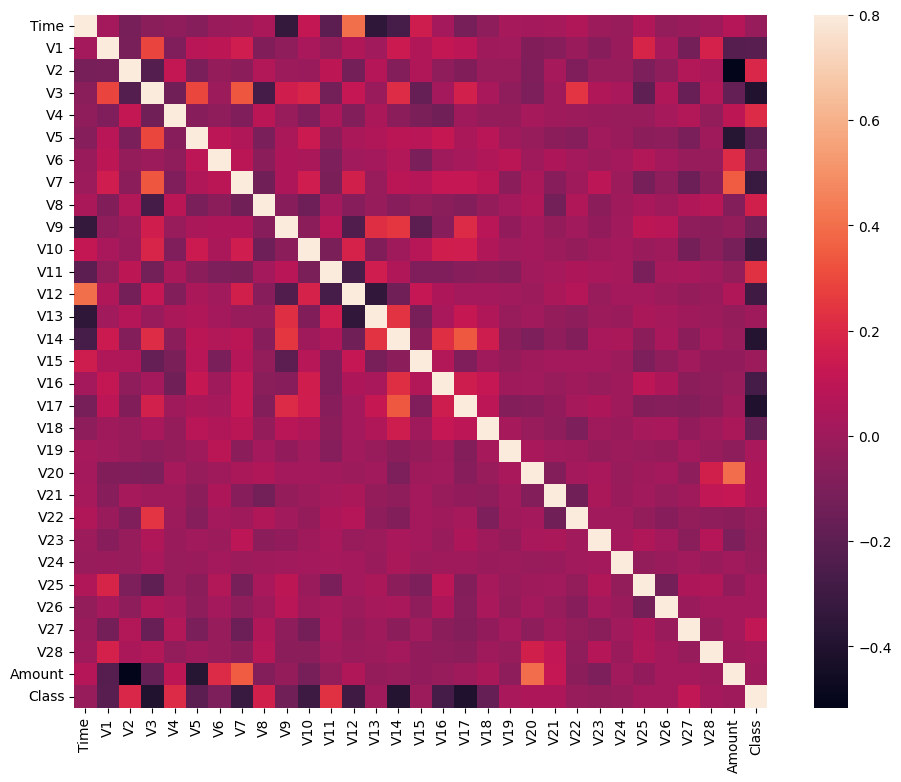

In [7]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [8]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(37722, 30)
(37722,)


In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

Model Evaluation Metrics:
Accuracy: 0.9987
Precision: 0.9643
Recall: 0.7500
F1-Score: 0.8438
Matthews Correlation Coefficient: 0.8498


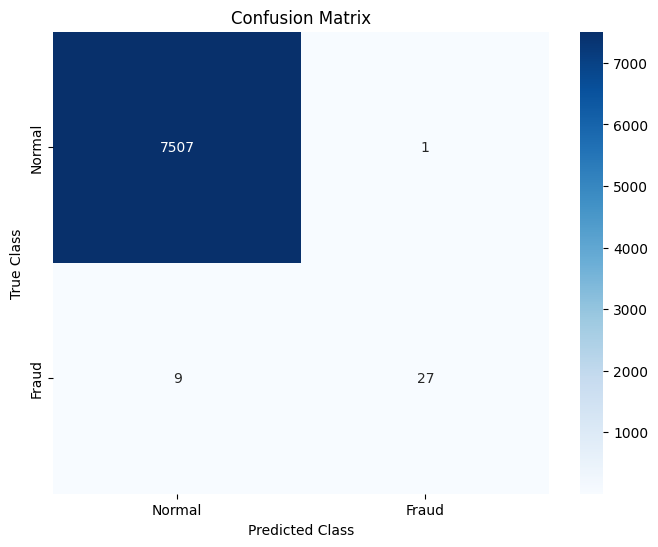

In [11]:
import numpy as np

# Convert to NumPy arrays (if not already)
yTest = np.array(yTest)
yPred = np.array(yPred)

# Create a mask where yTest is NOT NaN
mask = ~np.isnan(yTest)

# Filter both arrays
yTest_clean = yTest[mask]
yPred_clean = yPred[mask]

# Now evaluate
accuracy = accuracy_score(yTest_clean, yPred_clean)
precision = precision_score(yTest_clean, yPred_clean)
recall = recall_score(yTest_clean, yPred_clean)
f1 = f1_score(yTest_clean, yPred_clean)
mcc = matthews_corrcoef(yTest_clean, yPred_clean)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest_clean, yPred_clean)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
